# Installs

In [8]:
!pip install openai python-dotenv flair rouge sacrebleu emoji sentence-transformers

# Google Drive Client

In [9]:
from google.colab import drive
import os
from typing import Optional
import pandas as pd

class GoogleDriveHandler:
    """
    A class to handle Google Drive operations in Google Colab, including mounting the drive,
    setting the working directory, loading CSV files into DataFrames, and saving DataFrames to CSV files.

    Attributes:
    -----------
    working_directory : str
        The path to the folder in Google Drive to set as the working directory.

    Methods:
    --------
    __init__(self, working_directory: str):
        Mounts Google Drive and sets the working directory to the specified folder path.

    load_csv(self, file_name: str) -> pd.DataFrame:
        Loads a CSV file from the specified file name into a DataFrame.

    save_csv(self, data: pd.DataFrame, file_name: str) -> None:
        Saves a DataFrame to a CSV file with the specified file name.
    """

    def __init__(self, working_directory: str):
        """
        Initializes the GoogleDriveHandler by mounting Google Drive and setting the working directory.

        Parameters:
        -----------
        working_directory : str
            The path to the folder in Google Drive to set as the working directory.
        """
        drive.mount('/content/drive', force_remount=True)
        self.working_directory = working_directory
        os.chdir(self.working_directory)

    def load_csv(self, file_name: str) -> pd.DataFrame:
        """
        Loads a CSV file into a DataFrame.

        Parameters:
        -----------
        file_name : str
            The name of the CSV file to load.

        Returns:
        --------
        pd.DataFrame
            The loaded DataFrame.
        """
        file_path = os.path.join(self.working_directory, file_name)
        return pd.read_csv(file_path)

    def save_csv(self, data: pd.DataFrame, file_name: str) -> None:
        """
        Saves a DataFrame to a CSV file.

        Parameters:
        -----------
        data : pd.DataFrame
            The DataFrame to save.
        file_name : str
            The name of the CSV file to save the DataFrame as.
        """
        file_path = os.path.join(self.working_directory, file_name)
        data.to_csv(file_path, index=False)

# Example usage:
working_directory = '/content/drive/My Drive/ColabFiles/group-telegram-scraper/'
handler = GoogleDriveHandler(working_directory)
# df = handler.load_csv('dataset.csv')
# handler.save_csv(df, 'new_dataset.csv')

Mounted at /content/drive


# Loading Dataset

In [10]:
from IPython.display import display

df = handler.load_csv('top_100_translated.csv')
df.head()

,message,gpt-4o.hebrew_translation,gpt-4o.english_translation,gpt-4o-mini.hebrew_translation,gpt-4o-mini.english_translation,google-translate.hebrew_translation,google-translate.english_translation
0,🛑مصادر محليةاشتباكات مسلحة مع قوات الاحتلال في...,מקורות מקומיים: ירי לעבר כוחות הכיבוש בעיר טובאס,Local sources: Gunfire confrontation with occu...,מקורות מקומיים: חילופי אש עם כוחות הכיבוש בעיר...,Local sources: Armed clashes with occupation f...,🛑מקורות מקומיים: עימותים חמושים עם כוחות הכיבו...,🛑Local sources: Armed clashes with the occupat...
1,📍صحفي إسرائيلي متطرف أراد الاحتفال باغتيال يحي...,כתב ישראלי קיצוני רצה לחגוג את ההתנקשות ביהיא ...,An extremist Israeli journalist wanted to cele...,עיתונאי ישראלי קיצוני רצה לחגוג את חיסולו של י...,An extremist Israeli journalist wanted to cele...,📍עיתונאי ישראלי קיצוני שביקש לחגוג את רצח יחיא...,📍An extremist Israeli journalist who wanted to...
2,🛑الجو كئيب .. النفس ضيق .. التفكير كثير ومحدا ...,המזג אוויר עגום .. הנשימה כבדה .. המחשבה מרובה...,The weather is gloomy .. the breathing is heav...,המזג אוויר מדכא.. הנשמה צרה.. יש חשיבה רבה ולא...,The weather is gloomy.. the soul is tight.. th...,🛑 מזג האוויר קודר.. הנשמה קצרה.. חושבים הרבה ו...,🛑The atmosphere is gloomy.. The soul is tight....
3,🛑مصادر محلية تحليق مكثف لطائرات الاستطلاع فوق...,מקורות מקומיים: ריחוף מסיבי של מטוסי סיור מעל ...,Local sources: Intensive flight of reconnaissa...,מקורות מקומיים: טיסה אינטנסיבית של מטוסי ריגול...,Local sources: Intense flights of reconnaissan...,🛑מקורות מקומיים: טיסה אינטנסיבית של מטוסי סיור...,🛑Local sources: Intensive flights of reconnais...
4,🛑مصادر محلية شهداء ومصابون بقصف طائرات الاحتلا...,מקורות מקומיים: הרוגים ופצועים בהפגזת מטוסי הכ...,Local sources: Martyrs and injuries in the bom...,מקורות מקומיים: שורדים ונפגעים בהפצצת מטוסי הכ...,Local sources: Martyrs and injured in the bomb...,🛑מקורות מקומיים: אנוסים ונפצעו כשמטוסי כיבוש ה...,🛑Local sources: Martyrs and wounded as occupat...


In [11]:
df.columns

Index(['message', 'gpt-4o.hebrew_translation', 'gpt-4o.english_translation',
       'gpt-4o-mini.hebrew_translation', 'gpt-4o-mini.english_translation',
       'google-translate.hebrew_translation',
       'google-translate.english_translation'],
      dtype='object')

# Cleaning Dataset

In [12]:
import pandas as pd
import re
import emoji

class DataCleanerForNER:
    def __init__(self, df):
        self.df = df

    def clean_text(self, text):
        """
        Cleans the input text by removing emojis, extra punctuation, and fixing tokenization issues.
        """
        # Remove emojis
        text = self.remove_emojis(text)

        # Replace multiple dots (e.g. "..." or "..") with a single period
        text = re.sub(r'\.{2,}', '.', text)

        # Ensure proper spacing after punctuation
        text = re.sub(r'([.!?])', r'\1 ', text)

        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        return text

    def remove_emojis(self, text):
        """
        Removes emojis from the input text using the `emoji` package.
        """
        return emoji.replace_emoji(text, replace='')

    def clean_df(self):
        """
        Cleans the 'message' column in the DataFrame and returns a cleaned version.
        Ensures that 'message' and 'cleaned_message' columns appear first in the DataFrame.
        """
        # Apply the clean_text function to the 'message' column
        self.df['cleaned_message'] = self.df['message'].apply(self.clean_text)

        # Reorder columns: ['message', 'cleaned_message'] followed by the rest
        columns_order = ['message', 'cleaned_message'] + [col for col in self.df.columns if col not in ['message', 'cleaned_message']]

        # Return DataFrame with the desired column order
        return self.df[columns_order]

# Usage Example:

# Assuming df is your DataFrame with the 'message' column
df2 = df.copy()

# Initialize and clean the DataFrame
cleaner = DataCleanerForNER(df2)
cleaned_df = cleaner.clean_df()

# Display the cleaned DataFrame
cleaned_df.head()

,message,cleaned_message,gpt-4o.hebrew_translation,gpt-4o.english_translation,gpt-4o-mini.hebrew_translation,gpt-4o-mini.english_translation,google-translate.hebrew_translation,google-translate.english_translation
0,🛑مصادر محليةاشتباكات مسلحة مع قوات الاحتلال في...,مصادر محليةاشتباكات مسلحة مع قوات الاحتلال في ...,מקורות מקומיים: ירי לעבר כוחות הכיבוש בעיר טובאס,Local sources: Gunfire confrontation with occu...,מקורות מקומיים: חילופי אש עם כוחות הכיבוש בעיר...,Local sources: Armed clashes with occupation f...,🛑מקורות מקומיים: עימותים חמושים עם כוחות הכיבו...,🛑Local sources: Armed clashes with the occupat...
1,📍صحفي إسرائيلي متطرف أراد الاحتفال باغتيال يحي...,صحفي إسرائيلي متطرف أراد الاحتفال باغتيال يحيى...,כתב ישראלי קיצוני רצה לחגוג את ההתנקשות ביהיא ...,An extremist Israeli journalist wanted to cele...,עיתונאי ישראלי קיצוני רצה לחגוג את חיסולו של י...,An extremist Israeli journalist wanted to cele...,📍עיתונאי ישראלי קיצוני שביקש לחגוג את רצח יחיא...,📍An extremist Israeli journalist who wanted to...
2,🛑الجو كئيب .. النفس ضيق .. التفكير كثير ومحدا ...,الجو كئيب . النفس ضيق . التفكير كثير ومحدا مصد...,המזג אוויר עגום .. הנשימה כבדה .. המחשבה מרובה...,The weather is gloomy .. the breathing is heav...,המזג אוויר מדכא.. הנשמה צרה.. יש חשיבה רבה ולא...,The weather is gloomy.. the soul is tight.. th...,🛑 מזג האוויר קודר.. הנשמה קצרה.. חושבים הרבה ו...,🛑The atmosphere is gloomy.. The soul is tight....
3,🛑مصادر محلية تحليق مكثف لطائرات الاستطلاع فوق...,مصادر محلية تحليق مكثف لطائرات الاستطلاع فوق و...,מקורות מקומיים: ריחוף מסיבי של מטוסי סיור מעל ...,Local sources: Intensive flight of reconnaissa...,מקורות מקומיים: טיסה אינטנסיבית של מטוסי ריגול...,Local sources: Intense flights of reconnaissan...,🛑מקורות מקומיים: טיסה אינטנסיבית של מטוסי סיור...,🛑Local sources: Intensive flights of reconnais...
4,🛑مصادر محلية شهداء ومصابون بقصف طائرات الاحتلا...,مصادر محلية شهداء ومصابون بقصف طائرات الاحتلال...,מקורות מקומיים: הרוגים ופצועים בהפגזת מטוסי הכ...,Local sources: Martyrs and injuries in the bom...,מקורות מקומיים: שורדים ונפגעים בהפצצת מטוסי הכ...,Local sources: Martyrs and injured in the bomb...,🛑מקורות מקומיים: אנוסים ונפצעו כשמטוסי כיבוש ה...,🛑Local sources: Martyrs and wounded as occupat...


I have a bug in the GPT translation, and I realized it just now. So I decided to drop the rows with null values.

In [13]:
# Create a new DataFrame that excludes rows with any null values
filtered_df = cleaned_df.dropna()

# Alternatively, to remove rows with any empty strings or null values, you can do:
filtered_df = cleaned_df[cleaned_df.notnull().all(axis=1) & (cleaned_df != '').all(axis=1)]

# Display the shape of the filtered DataFrame
print(f"The shape of the filtered DataFrame is: {filtered_df.shape}")

# Display the filtered DataFrame
filtered_df.head()

The shape of the filtered DataFrame is: (76, 8)


,message,cleaned_message,gpt-4o.hebrew_translation,gpt-4o.english_translation,gpt-4o-mini.hebrew_translation,gpt-4o-mini.english_translation,google-translate.hebrew_translation,google-translate.english_translation
0,🛑مصادر محليةاشتباكات مسلحة مع قوات الاحتلال في...,مصادر محليةاشتباكات مسلحة مع قوات الاحتلال في ...,מקורות מקומיים: ירי לעבר כוחות הכיבוש בעיר טובאס,Local sources: Gunfire confrontation with occu...,מקורות מקומיים: חילופי אש עם כוחות הכיבוש בעיר...,Local sources: Armed clashes with occupation f...,🛑מקורות מקומיים: עימותים חמושים עם כוחות הכיבו...,🛑Local sources: Armed clashes with the occupat...
1,📍صحفي إسرائيلي متطرف أراد الاحتفال باغتيال يحي...,صحفي إسرائيلي متطرف أراد الاحتفال باغتيال يحيى...,כתב ישראלי קיצוני רצה לחגוג את ההתנקשות ביהיא ...,An extremist Israeli journalist wanted to cele...,עיתונאי ישראלי קיצוני רצה לחגוג את חיסולו של י...,An extremist Israeli journalist wanted to cele...,📍עיתונאי ישראלי קיצוני שביקש לחגוג את רצח יחיא...,📍An extremist Israeli journalist who wanted to...
2,🛑الجو كئيب .. النفس ضيق .. التفكير كثير ومحدا ...,الجو كئيب . النفس ضيق . التفكير كثير ومحدا مصد...,המזג אוויר עגום .. הנשימה כבדה .. המחשבה מרובה...,The weather is gloomy .. the breathing is heav...,המזג אוויר מדכא.. הנשמה צרה.. יש חשיבה רבה ולא...,The weather is gloomy.. the soul is tight.. th...,🛑 מזג האוויר קודר.. הנשמה קצרה.. חושבים הרבה ו...,🛑The atmosphere is gloomy.. The soul is tight....
3,🛑مصادر محلية تحليق مكثف لطائرات الاستطلاع فوق...,مصادر محلية تحليق مكثف لطائرات الاستطلاع فوق و...,מקורות מקומיים: ריחוף מסיבי של מטוסי סיור מעל ...,Local sources: Intensive flight of reconnaissa...,מקורות מקומיים: טיסה אינטנסיבית של מטוסי ריגול...,Local sources: Intense flights of reconnaissan...,🛑מקורות מקומיים: טיסה אינטנסיבית של מטוסי סיור...,🛑Local sources: Intensive flights of reconnais...
4,🛑مصادر محلية شهداء ومصابون بقصف طائرات الاحتلا...,مصادر محلية شهداء ومصابون بقصف طائرات الاحتلال...,מקורות מקומיים: הרוגים ופצועים בהפגזת מטוסי הכ...,Local sources: Martyrs and injuries in the bom...,מקורות מקומיים: שורדים ונפגעים בהפצצת מטוסי הכ...,Local sources: Martyrs and injured in the bomb...,🛑מקורות מקומיים: אנוסים ונפצעו כשמטוסי כיבוש ה...,🛑Local sources: Martyrs and wounded as occupat...


# Evaluation

## Metrics: Cosine Similarity, WND and TER

In [14]:
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge import Rouge
import torch
import numpy as np
import json
import warnings
from sacrebleu.metrics import TER
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import euclidean_distances

warnings.filterwarnings("ignore", category=FutureWarning, module="transformers.tokenization_utils_base")

class MultilingualTranslationEvaluator:
    rouge = Rouge()

    def __init__(self):
        nltk.download('punkt', quiet=True)
        nltk.download('stopwords', quiet=True)
        self.tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/LaBSE')
        self.model = AutoModel.from_pretrained('sentence-transformers/LaBSE')
        self.ter = TER()
        self.stop_words = set(stopwords.words('english'))

    def encode_text(self, text):
        inputs = self.tokenizer(text, return_tensors="pt", padding=True, truncation=True)
        outputs = self.model(**inputs)
        return outputs.pooler_output.detach().numpy()

    def calculate_cosine_similarity(self, references, candidate):
        if not references or not candidate:
            return 0
        ref_embedding = self.encode_text(references[0])
        candidate_embedding = self.encode_text(candidate)
        return cosine_similarity(ref_embedding, candidate_embedding)[0][0]

    def calculate_wmd(self, reference, candidate):
        ref_embedding = self.encode_text(reference[0])
        candidate_embedding = self.encode_text(candidate)

        # Calculate Euclidean distance between the sentence embeddings
        distance = euclidean_distances(ref_embedding, candidate_embedding)[0][0]

        return distance

    def calculate_ter(self, reference, candidate):
        return self.ter.corpus_score([candidate], [[reference[0]]]).score / 100

    def evaluate(self, references, candidate):
        results = {
            'Cosine Similarity (LaBSE)': float(self.calculate_cosine_similarity(references, candidate)),
            'Word Mover\'s Distance (WMD)': float(self.calculate_wmd(references, candidate)),
            'Translation Edit Rate (TER)': float(self.calculate_ter(references, candidate))
        }
        return results

    def print_results(self, results):
        print(json.dumps(results, indent=2))

if __name__ == "__main__":
    reference = ["مرحبا بكم في عالم الترجمة الآلية."]
    candidate1 = "hi"
    candidate2 = "Welcome to the world of machine translation."
    candidate3 = "ברוכים הבאים לעולם של תרגום מכונה."

    evaluator = MultilingualTranslationEvaluator()

    metrics1 = evaluator.evaluate(reference, candidate1)
    print("Translation Evaluation Results for 'hi':")
    evaluator.print_results(metrics1)

    metrics2 = evaluator.evaluate(reference, candidate2)
    print("Translation Evaluation Results for 'Welcome to the world of machine translation.':")
    evaluator.print_results(metrics2)

    metrics3 = evaluator.evaluate(reference, candidate3)
    print("Translation Evaluation Results for 'ברוכים הבאים לעולם של תרגום מכונה.':")
    evaluator.print_results(metrics3)

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

Translation Evaluation Results for 'hi':
{
  "Cosine Similarity (LaBSE)": 0.2147735208272934,
  "Word Mover's Distance (WMD)": 13.423367500305176,
  "Translation Edit Rate (TER)": 1.0
}
Translation Evaluation Results for 'Welcome to the world of machine translation.':
{
  "Cosine Similarity (LaBSE)": 0.8768337368965149,
  "Word Mover's Distance (WMD)": 5.39895486831665,
  "Translation Edit Rate (TER)": 1.1666666666666667
}
Translation Evaluation Results for 'ברוכים הבאים לעולם של תרגום מכונה.':
{
  "Cosine Similarity (LaBSE)": 0.9019448757171631,
  "Word Mover's Distance (WMD)": 5.291924476623535,
  "Translation Edit Rate (TER)": 1.0
}


### Analysis and Conclusion:

- **The Results for "hi"**:
  - The **low cosine similarity**, **high WMD**, and **high TER** all make sense. "Hi" is a very short, simple translation that is vastly different from a more complex sentence about machine translation, both semantically and structurally. So these results correctly reflect that "hi" is not an adequate or relevant translation.

- **The Results for "Welcome to the world of machine translation."**:
  - The **high cosine similarity** shows that the translation is semantically close to the reference. The **moderate WMD** and **slightly high TER** suggest that while the candidate and reference sentences are similar, they may not be identical, with some differences in word choice or sentence structure.

### Final Thoughts:
- **The metrics make sense** for the two sentences: "hi" is evaluated as a poor translation, while "Welcome to the world of machine translation." is evaluated as a much better one.
- **WMD and TER** reflect structural or word choice differences, whereas **cosine similarity** focuses on the overall semantic meaning.
- Overall, the results are consistent with what you would expect for such different translations.

### Trying Another Model
The model 'sentence-transformers/distilbert-multilingual-nli-stsb-quora-ranking' may be a better model for that task.

In [15]:
from openai import OpenAI
from google.colab import userdata
from sklearn.metrics.pairwise import cosine_similarity

api_key = userdata.get('OPENAI_API_KEY')
client = OpenAI(api_key=api_key)

def get_embedding(text):
  """Gets the embedding of a text using OpenAI API."""
  response = client.embeddings.create(
      input=text,
      model="text-embedding-3-small"
  )
  return response.data[0].embedding

# Sentences for comparison
sentences = ["مرحبا بكم في عالم الترجمة الآلية.", "Welcome to the world of machine translation."]

# Get embeddings for each sentence using OpenAI API
embeddings = [get_embedding(sentence) for sentence in sentences]

# Calculate cosine similarity between the embeddings
similarity = cosine_similarity([embeddings[0]], [embeddings[1]])

# Print the similarity score (between -1 and 1, where 1 means identical)
print(f"Cosine Similarity: {similarity[0][0]}")

Cosine Similarity: 0.5501981359200256


In [16]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load the model
model = SentenceTransformer('sentence-transformers/distilbert-multilingual-nli-stsb-quora-ranking')

# Sentences for comparison
sentences = ["مرحبا بكم في عالم الترجمة الآلية.", "Welcome to the world of machine translation."]

# Encode the sentences to get embeddings
embeddings = model.encode(sentences)

# Calculate cosine similarity between the embeddings
similarity = cosine_similarity([embeddings[0]], [embeddings[1]])

# Print the similarity score (between -1 and 1, where 1 means identical)
print(f"Cosine Similarity: {similarity[0][0]}")


Cosine Similarity: 0.9691134691238403


# NER

## English NER

In [17]:
import warnings
import logging
from flair.data import Sentence
from flair.models import SequenceTagger

# Suppress warnings
warnings.filterwarnings("ignore")

# Set Flair logging level to ERROR to suppress the informational print
logging.getLogger("flair").setLevel(logging.ERROR)

class EnglishNER:
    def __init__(self):
        # Load the Flair NER tagger for English
        self.ner_tagger = SequenceTagger.load("flair/ner-english")

    def process_text(self, text):
        sentence = Sentence(text)
        self.ner_tagger.predict(sentence)
        ner_results = sentence.get_spans('ner')
        return self._combine_entities(ner_results)

    def _combine_entities(self, ner_results):
        combined_entities = []
        for entity in ner_results:
            combined_entity = {
                'entity': entity.tag,
                'score': entity.score,
                'word': entity.text,
                'start': entity.start_position,
                'end': entity.end_position
            }
            combined_entities.append(combined_entity)
        return combined_entities

# Usage example:
if __name__ == "__main__":
    ner = EnglishNER()

    text_en = """
    George Washington went to Washington. He was the first president of the United States.
    """

    combined_entities_en = ner.process_text(text_en)

    print("Combined Entities:")
    for entity in combined_entities_en:
        print(entity)


pytorch_model.bin:   0%|          | 0.00/419M [00:00<?, ?B/s]

Combined Entities:
{'entity': 'PER', 'score': 0.9989112019538879, 'word': 'George Washington', 'start': 5, 'end': 22}
{'entity': 'LOC', 'score': 0.9878308176994324, 'word': 'Washington', 'start': 31, 'end': 41}
{'entity': 'LOC', 'score': 0.9996209442615509, 'word': 'United States', 'start': 77, 'end': 90}


## Arabic NER

In [18]:
import warnings
from transformers import pipeline, logging

# Suppress warnings
warnings.filterwarnings("ignore")
logging.set_verbosity_error()

class ArabicNER:
    def __init__(self):
        self.ner = pipeline('ner', model='CAMeL-Lab/bert-base-arabic-camelbert-msa-ner')

    def process_text(self, text):
        ner_results = self.ner(text)
        return self._combine_entities(ner_results)

    def _combine_entities(self, ner_results):
        combined_entities = []
        current_entity = None

        for entity in ner_results:
            entity_tag = entity['entity']
            entity_type = entity_tag.split('-')[-1]
            word = entity['word']

            # Handle subword tokens
            if word.startswith('##'):
                # Remove the '##' and append to current entity's word
                word = word[2:]
                if current_entity:
                    current_entity['word'] += word
                    current_entity['end'] = entity['end']
                    current_entity['scores'].append(entity['score'])
                continue

            # If we encounter a 'B-' tag, start a new entity
            if entity_tag.startswith('B'):
                if current_entity:
                    self._finalize_entity(current_entity)
                    combined_entities.append(current_entity)
                current_entity = self._create_new_entity(entity, entity_type, word)

            # If we encounter an 'I-' tag and it's the same type, continue the entity
            elif entity_tag.startswith('I') and current_entity and current_entity['type'] == entity_type:
                self._continue_entity(current_entity, entity, word)

            # In case of an unexpected tag or out of entity, finalize the current entity
            else:
                if current_entity:
                    self._finalize_entity(current_entity)
                    combined_entities.append(current_entity)
                current_entity = self._create_new_entity(entity, entity_type, word)

        # Finalize any remaining entity
        if current_entity:
            self._finalize_entity(current_entity)
            combined_entities.append(current_entity)

        return combined_entities


    def _create_new_entity(self, entity, entity_type, word):
        return {
            'entity': entity['entity'],
            'score': entity['score'],
            'index': entity['index'],
            'word': word,
            'start': entity['start'],
            'end': entity['end'],
            'type': entity_type,
            'scores': [entity['score']]
        }

    def _continue_entity(self, current_entity, entity, word):
        # Handle subword tokens with '##'
        if word.startswith('##'):
            word = word[2:]  # Remove the '##' prefix
            current_entity['word'] += word  # Append without space
        else:
            current_entity['word'] += f" {word}"  # Append with space for new words
        current_entity['end'] = entity['end']
        current_entity['scores'].append(entity['score'])

    def _finalize_entity(self, entity):
        avg_score = sum(entity['scores']) / len(entity['scores'])
        entity['score'] = avg_score
        del entity['scores']
        del entity['type']


# Usage example:
if __name__ == "__main__":
    ner = ArabicNER()

    text_ar = """
    الملك سلمان بن عبد العزيز، الذي وُلد في الرياض عام 1935، هو ملك المملكة العربية السعودية منذ عام 2015.
    شغل منصب حاكم الرياض لأكثر من خمسين عامًا وكان له دور بارز في تطوير المدينة لتصبح مركزًا إقليميًا.
    في عام 2017، تم تعيين ابنه محمد بن سلمان وليًا للعهد بعد أن أطلق رؤية 2030 التي تهدف إلى تقليل الاعتماد على النفط وتعزيز القطاعات الاقتصادية الأخرى.
    في عام 2021، تم توقيع اتفاقيات تجارية جديدة بين السعودية والصين لتعزيز التعاون الاقتصادي.
    الملك سلمان هو أيضًا رئيس جامعة الملك سعود وراعي عدد من المبادرات الثقافية في الشرق الأوسط.
    """

    combined_entities_ar = ner.process_text(text_ar)

    print("Combined Entities:")
    for entity in combined_entities_ar:
        print(entity)

config.json:   0%|          | 0.00/980 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/305k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Combined Entities:
{'entity': 'B-PERS', 'score': 0.9922562092542648, 'index': 2, 'word': 'سلمان بن عبد العزيز', 'start': 11, 'end': 30}
{'entity': 'B-LOC', 'score': 0.9963874816894531, 'index': 10, 'word': 'الرياض', 'start': 45, 'end': 51}
{'entity': 'B-LOC', 'score': 0.9815539121627808, 'index': 17, 'word': 'المملكة العربية السعودية', 'start': 69, 'end': 93}
{'entity': 'B-LOC', 'score': 0.9936323761940002, 'index': 27, 'word': 'الرياض', 'start': 126, 'end': 132}
{'entity': 'B-PERS', 'score': 0.9895312587420145, 'index': 50, 'word': 'محمد بن سلمان', 'start': 242, 'end': 255}
{'entity': 'B-LOC', 'score': 0.9946568012237549, 'index': 84, 'word': 'السعودية', 'start': 416, 'end': 424}
{'entity': 'B-LOC', 'score': 0.9894094467163086, 'index': 85, 'word': 'والصين', 'start': 425, 'end': 431}
{'entity': 'B-PERS', 'score': 0.9902392625808716, 'index': 91, 'word': 'سلمان', 'start': 468, 'end': 473}
{'entity': 'B-ORG', 'score': 0.6507586240768433, 'index': 95, 'word': 'جامعة', 'start': 488, 'end'

In [19]:
# Below is an example of text that made some problems in adding '##', which I added handling later
ner = ArabicNER()
text = "مصادر محليةاشتباكات مسلحة مع قوات الاحتلال في مدينة طوباس	"
combined_entities_ar = ner.process_text(text)
print("Combined Entities:")
for entity in combined_entities_ar:
    print(entity)

Combined Entities:
{'entity': 'B-LOC', 'score': 0.8503995736440023, 'index': 13, 'word': 'طوباس', 'start': 52, 'end': 57}


## Hebrew NER

In [20]:
import warnings
from transformers import pipeline, logging

# Suppress warnings
warnings.filterwarnings("ignore")
logging.set_verbosity_error()

class HebrewNER:
    def __init__(self):
        self.ner = pipeline(
            "token-classification",
            model="avichr/heBERT_NER",
            tokenizer="avichr/heBERT_NER",
        )

    def process_text(self, text):
        ner_results = self.ner(text)
        return self._combine_entities(ner_results)

    def _combine_entities(self, ner_results):
        combined_entities = []
        current_entity = None
        previous_index = None

        for entity in ner_results:
            entity_tag = entity['entity']
            entity_type = entity_tag.split('_')[-1]
            word = entity['word']
            current_index = entity['index']

            if word.startswith('##'):
                word = word[2:]
                subword = True
            else:
                subword = False

            if current_entity and entity_type == current_entity['type'] and current_index == previous_index + 1:
                self._continue_entity(current_entity, entity, word, subword)
            else:
                if current_entity:
                    self._finalize_entity(current_entity)
                    combined_entities.append(current_entity)
                current_entity = self._create_new_entity(entity, entity_type, word)

            previous_index = current_index

        if current_entity:
            self._finalize_entity(current_entity)
            combined_entities.append(current_entity)

        # Remove single characters or invalid entities
        combined_entities = [e for e in combined_entities if len(e['word'].strip()) > 1]

        return combined_entities

    def _create_new_entity(self, entity, entity_type, word):
        return {
            'entity': entity['entity'],
            'score': entity['score'],
            'index': entity['index'],
            'word': word,
            'start': entity['start'],
            'end': entity['end'],
            'type': entity_type,
            'scores': [entity['score']]
        }

    def _continue_entity(self, current_entity, entity, word, subword):
        if subword or all(char in '.,;:!?()[]{}\'"""''—–…' for char in word):
            current_entity['word'] += f"{word}"
        else:
            current_entity['word'] += f" {word}"
        current_entity['end'] = entity['end']
        current_entity['scores'].append(entity['score'])

    def _finalize_entity(self, entity):
        avg_score = sum(entity['scores']) / len(entity['scores'])
        entity['score'] = avg_score
        del entity['scores']
        del entity['type']

# Usage example:
if __name__ == "__main__":
    ner = HebrewNER()

    text_he = """
    יצחק רבין, שנולד בתל אביב בשנת 1922, היה ראש הממשלה של מדינת ישראל בין השנים 1974 ל-1977 ושוב בין 1992 ל-1995.
    הוא למד באוניברסיטת ירושלים והיה קצין בכיר בצה"ל, אשר הוביל את הניצחון הישראלי במלחמת ששת הימים בשנת 1967.
    במהלך כהונתו השנייה כראש ממשלה, חתם רבין על הסכמי אוסלו עם יאסר ערפאת, מנהיג אש"ף, והסכם השלום עם ירדן בשנת 1994.
    בנובמבר 1995, רבין נרצח על ידי יגאל עמיר בעצרת למען השלום בכיכר מלכי ישראל.
    """

    combined_entities_he = ner.process_text(text_he)

    print("Combined Entities:")
    for entity in combined_entities_he:
        print(entity)

config.json:   0%|          | 0.00/838 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/299k [00:00<?, ?B/s]

Combined Entities:
{'entity': 'B_PERS', 'score': 0.9891732633113861, 'index': 1, 'word': 'יצחק רבין', 'start': 5, 'end': 14}
{'entity': 'B_LOC', 'score': 0.8672104775905609, 'index': 5, 'word': 'בתל אביב', 'start': 22, 'end': 30}
{'entity': 'B_DATE', 'score': 0.9399690628051758, 'index': 8, 'word': '1922', 'start': 36, 'end': 40}
{'entity': 'B_ORG', 'score': 0.7892199754714966, 'index': 14, 'word': 'מדינת ישראל', 'start': 60, 'end': 71}
{'entity': 'B_DATE', 'score': 0.9106642007827759, 'index': 18, 'word': '1974', 'start': 82, 'end': 86}
{'entity': 'B_DATE', 'score': 0.7346161305904388, 'index': 20, 'word': '- 1977', 'start': 88, 'end': 93}
{'entity': 'B_DATE', 'score': 0.9017922878265381, 'index': 24, 'word': '1992', 'start': 103, 'end': 107}
{'entity': 'B_DATE', 'score': 0.7161687314510345, 'index': 26, 'word': '- 1995', 'start': 109, 'end': 114}
{'entity': 'B_LOC', 'score': 0.5318642854690552, 'index': 32, 'word': 'ירושלים', 'start': 140, 'end': 147}
{'entity': 'B_ORG', 'score': 0.8

## NER Pipeline

In [21]:
from typing import Dict, List
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

class NEREvaluator:
    def __init__(self):
        self.en_ner = EnglishNER()  # Custom English NER
        self.ar_ner = ArabicNER()   # Custom Arabic NER
        self.he_ner = HebrewNER()   # Custom Hebrew NER
        self.model = SentenceTransformer('sentence-transformers/distilbert-multilingual-nli-stsb-quora-ranking')
        self.results = []  # Store results for future reference

    def extract_entities(self, text: str, language: str = 'en') -> List[str]:
        """Extract entities without caring about type or date, just return the words."""
        if language == 'en':
            entities = self.extract_entities_custom(text, self.en_ner)
        elif language == 'ar':
            entities = self.extract_entities_custom(text, self.ar_ner)
        elif language == 'he':
            entities = self.extract_entities_custom(text, self.he_ner)
        else:
            raise ValueError(f"Unsupported language: {language}")
        return entities

    def extract_entities_custom(self, text: str, ner_model) -> List[str]:
        """Extract entities from a custom NER model, ignoring dates and irrelevant entity types."""
        ner_results = ner_model.process_text(text)
        entities = []

        for entity in ner_results:
            entity_type = entity['entity']
            if "DATE" not in entity_type:  # Properly ignore dates by checking the entity type
                entities.append(entity['word'])  # Just collect the entity word

        return entities

    def calculate_cosine_similarity(self, text1: str, text2: str) -> float:
        """Calculate cosine similarity between two texts using the multilingual model."""
        embeddings = self.model.encode([text1, text2])
        similarity = cosine_similarity([embeddings[0]], [embeddings[1]])
        return similarity[0][0]

    def compare_entities(self, reference_entities: List[str], candidate_entities: List[str]) -> Dict[str, List[str]]:
        """Compare two lists of entities based on cosine similarity of their words."""
        ref_set = set(reference_entities)
        cand_set = set(candidate_entities)

        missing = ref_set.copy()
        extra = cand_set.copy()
        matching = []

        # For each reference entity, find a match in the candidate list based on cosine similarity
        for ref_entity in ref_set:
            for cand_entity in cand_set:
                similarity = self.calculate_cosine_similarity(ref_entity, cand_entity)
                if similarity > 0.80:  # Consider as a match if cosine similarity > 80%
                    matching.append((ref_entity, cand_entity))
                    missing.discard(ref_entity)  # Use discard instead of remove
                    extra.discard(cand_entity)   # Use discard instead of remove
                    break  # Stop after finding the first match

        return {
            'missing': list(missing),
            'extra': list(extra),
            'matching': matching
        }

    def evaluate(self, reference: str, candidate: str, ref_lang: str = 'en', cand_lang: str = 'en') -> Dict[str, Dict[str, List[str]]]:
        reference_entities = self.extract_entities(reference, ref_lang)
        candidate_entities = self.extract_entities(candidate, cand_lang)

        # Calculate semantic similarity of overall texts
        similarity_score = self.calculate_cosine_similarity(reference, candidate)

        # Check if reference has any named entities
        has_entities = len(reference_entities) > 0

        if has_entities:
            entity_comparison = self.compare_entities(reference_entities, candidate_entities)

            # Calculate the NER match score (based on cosine similarity of individual entities)
            total_ref_entities = len(reference_entities)
            ner_match_count = len(entity_comparison['matching'])
            ner_match_score = ner_match_count / total_ref_entities if total_ref_entities > 0 else 0

            # Penalize if entities are missing or extra
            penalty = len(entity_comparison['missing']) / total_ref_entities if total_ref_entities > 0 else 0

            # Final score combines NER match score with text similarity score, penalizing for missing entities
            final_score = (ner_match_score * similarity_score) * (1 - penalty)
        else:
            entity_comparison = {'missing': [], 'extra': [], 'matching': []}
            ner_match_score = 0
            penalty = 0
            final_score = similarity_score  # Use only semantic similarity when no entities are present

        # Store results
        result = {
            'reference': reference,
            'candidate': candidate,
            'entity_comparison': entity_comparison,
            'semantic_similarity': similarity_score,
            'ner_match_score': ner_match_score,
            'penalty': penalty,
            'final_score': final_score,
            'has_entities': has_entities  # Flag indicating whether reference has named entities
        }
        self.results.append(result)

        return result


NEREvaluator Result Explanation:

1. entity_comparison:
   - 'missing': Entities in the original text but not in the translation.
   - 'extra': Entities in the translation but not in the original text.
   - 'matching': Pairs of entities successfully matched between original and translation.
   Note: Entity matching uses a cosine similarity threshold of 0.80 (adjustable).

2. semantic_similarity:
   Cosine similarity between the original and translated full texts (0-1 scale).

3. ner_match_score:
   Ratio of matched entities to total entities in the original text (0-1 scale).

4. penalty:
   Proportion of missing entities relative to total entities (0-1 scale).

5. final_score:
   Overall translation quality, combining entity preservation and semantic similarity.
   Calculated as: (ner_match_score * semantic_similarity) * (1 - penalty)
   Higher scores indicate better translations (0-1 scale).

Important Notes:
- Uses a multilingual SentenceTransformer model for cross-language comparisons.
- Applies to both full-text similarity and entity matching.
- Ignores date entities to focus on more significant named entities.
- Works across multiple languages (tested with Arabic, Hebrew, and English).
- Entity extraction relies on language-specific NER models (not included in this class).

# Running Metrics & NER Classes

In [22]:
# Initialize the NER evaluator
evaluator = NEREvaluator()

## Debug Evaluator

In [23]:
# Define the translation columns
translation_columns = [
    ('gpt-4o', 'gpt-4o.hebrew_translation', 'gpt-4o.english_translation'),
    ('gpt-4o-mini', 'gpt-4o-mini.hebrew_translation', 'gpt-4o-mini.english_translation'),
    ('google-translate', 'google-translate.hebrew_translation', 'google-translate.english_translation')
]

# Iterate over the DataFrame and evaluate NER for each translator
for idx, row in filtered_df.head(2).iterrows():
    ar_reference = row['cleaned_message']

    print(f"\nRow {idx}:")

    for translator, he_col, en_col in translation_columns:
        he_candidate = row[he_col]
        en_candidate = row[en_col]

        # Arabic to Hebrew comparison
        result_he = evaluator.evaluate(ar_reference, he_candidate, 'ar', 'he')
        print(f"{translator} - Arabic to Hebrew Evaluation:")
        print(result_he)

        # Arabic to English comparison
        result_en = evaluator.evaluate(ar_reference, en_candidate, 'ar', 'en')
        print(f"{translator} - Arabic to English Evaluation:")
        print(result_en)

        print()  # Add a blank line for readability


Row 0:
gpt-4o - Arabic to Hebrew Evaluation:
{'reference': 'مصادر محليةاشتباكات مسلحة مع قوات الاحتلال في مدينة طوباس', 'candidate': 'מקורות מקומיים: ירי לעבר כוחות הכיבוש בעיר טובאס', 'entity_comparison': {'missing': [], 'extra': [], 'matching': [('طوباس', 'בעיר טובאס')]}, 'semantic_similarity': 0.96457386, 'ner_match_score': 1.0, 'penalty': 0.0, 'final_score': 0.964573860168457, 'has_entities': True}
gpt-4o - Arabic to English Evaluation:
{'reference': 'مصادر محليةاشتباكات مسلحة مع قوات الاحتلال في مدينة طوباس', 'candidate': 'Local sources: Gunfire confrontation with occupation forces in the city of Tubas', 'entity_comparison': {'missing': [], 'extra': [], 'matching': [('طوباس', 'Tubas')]}, 'semantic_similarity': 0.9587384, 'ner_match_score': 1.0, 'penalty': 0.0, 'final_score': 0.958738386631012, 'has_entities': True}

gpt-4o-mini - Arabic to Hebrew Evaluation:
{'reference': 'مصادر محليةاشتباكات مسلحة مع قوات الاحتلال في مدينة طوباس', 'candidate': 'מקורות מקומיים: חילופי אש עם כוחות

## Running Evaluator

In [24]:
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed, TimeoutError
from tqdm import tqdm
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)

# Function to evaluate a translation and return a formatted row
def evaluate_translation(ar_reference, translation, translator, target_language, evaluator):
    # Ensure the translation is not NaN or None before evaluation
    if not isinstance(translation, str) or translation == '':
        logging.warning(f"Missing translation for {translator} - {target_language}. Skipping evaluation.")
        return None

    eval_result = evaluator.evaluate(ar_reference, translation, 'ar', target_language)

    # Construct the row dictionary
    row = {
        'cleaned_message': ar_reference,
        'model_name': translator,
        'translation_language': target_language,
        'translated_text': translation,
        'semantic_similarity': eval_result['semantic_similarity'],
        'ner_match_score': eval_result['ner_match_score'],
        'entity_comparison': eval_result['entity_comparison'],
        'penalty': eval_result['penalty'],
        'final_score': eval_result['final_score']
    }
    return row

# Function to evaluate with timeout handling
def evaluate_translation_with_timeout(ar_reference, translation, translator, target_language, evaluator, timeout=60):
    try:
        logging.info(f"Starting evaluation for {translator} - {target_language}")
        return evaluate_translation(ar_reference, translation, translator, target_language, evaluator)
    except TimeoutError:
        logging.error(f"Timeout occurred for {translator} - {target_language}.")
        return None  # Handle timeout case

# Function to run evaluations in parallel with a progress bar
def run_parallel_evaluations(df, translation_columns, evaluator, max_workers=2):
    rows_list = []
    total_tasks = len(df) * len(translation_columns) * 2  # Each row has 2 translations per model

    # Use ThreadPoolExecutor for parallel processing with a limit on workers
    with ThreadPoolExecutor(max_workers=max_workers) as executor:  # Adjust max_workers as needed
        futures = []

        # Iterate through the original DataFrame and create tasks for evaluations
        for idx, row in df.iterrows():
            ar_reference = row['cleaned_message']

            # Loop through each translation model
            for translator, he_col, en_col in translation_columns:
                he_translation = row[he_col]
                en_translation = row[en_col]

                # Submit Hebrew translation evaluation with timeout handling
                futures.append(
                    executor.submit(evaluate_translation_with_timeout, ar_reference, he_translation, translator, 'he', evaluator)
                )

                # Submit English translation evaluation with timeout handling
                futures.append(
                    executor.submit(evaluate_translation_with_timeout, ar_reference, en_translation, translator, 'en', evaluator)
                )

        # Use tqdm to display progress
        for future in tqdm(as_completed(futures), total=total_tasks, desc="Evaluating Translations"):
            result = future.result()
            if result is not None:  # Skip None results (e.g., due to timeout)
                rows_list.append(result)

    # Create DataFrame from the accumulated rows
    return pd.DataFrame(rows_list)

# Batch processing function to handle large dataframes in smaller batches
def process_in_batches(df, translation_columns, evaluator, batch_size=10, max_workers=2):
    final_df = pd.DataFrame()  # Empty DataFrame to accumulate results

    # Fill NaN values with empty strings to prevent processing errors
    df = df.fillna('')

    for i in range(0, len(df), batch_size):
        batch_df = df.iloc[i:i + batch_size]  # Slice the batch
        logging.info(f"Processing batch {i // batch_size + 1}/{(len(df) // batch_size) + 1}")

        # Run parallel evaluations for the current batch
        batch_result_df = run_parallel_evaluations(batch_df, translation_columns, evaluator, max_workers=max_workers)

        # Append batch results to final DataFrame
        final_df = pd.concat([final_df, batch_result_df], ignore_index=True)

    return final_df

# Define the translation columns
translation_columns = [
    ('gpt-4o', 'gpt-4o.hebrew_translation', 'gpt-4o.english_translation'),
    ('gpt-4o-mini', 'gpt-4o-mini.hebrew_translation', 'gpt-4o-mini.english_translation'),
    ('google-translate', 'google-translate.hebrew_translation', 'google-translate.english_translation')
]

# Assuming evaluator_df is original DataFrame and evaluator is already defined
batch_size = 100  # Adjust based on available memory and system capacity
max_workers = 10  # Adjust based on available CPU cores

# Run batch processing
evaluator_df = process_in_batches(filtered_df, translation_columns, evaluator, batch_size=batch_size, max_workers=max_workers)

# Display the new structured DataFrame
evaluator_df

Evaluating Translations: 100%|██████████| 456/456 [02:05<00:00,  3.64it/s]


,cleaned_message,model_name,translation_language,translated_text,semantic_similarity,ner_match_score,entity_comparison,penalty,final_score
0,مصادر محليةاشتباكات مسلحة مع قوات الاحتلال في ...,gpt-4o,en,Local sources: Gunfire confrontation with occu...,0.958738,1.0,"{'missing': [], 'extra': [], 'matching': [('طو...",0.0,0.958738
1,مصادر محليةاشتباكات مسلحة مع قوات الاحتلال في ...,gpt-4o-mini,en,Local sources: Armed clashes with occupation f...,0.961257,1.0,"{'missing': [], 'extra': [], 'matching': [('طو...",0.0,0.961257
2,مصادر محليةاشتباكات مسلحة مع قوات الاحتلال في ...,google-translate,en,🛑Local sources: Armed clashes with the occupat...,0.965337,1.0,"{'missing': [], 'extra': [], 'matching': [('طو...",0.0,0.965337
3,مصادر محليةاشتباكات مسلحة مع قوات الاحتلال في ...,gpt-4o,he,מקורות מקומיים: ירי לעבר כוחות הכיבוש בעיר טובאס,0.964574,1.0,"{'missing': [], 'extra': [], 'matching': [('طو...",0.0,0.964574
4,صحفي إسرائيلي متطرف أراد الاحتفال باغتيال يحيى...,gpt-4o-mini,en,An extremist Israeli journalist wanted to cele...,0.976973,1.0,"{'missing': [], 'extra': ['Jerusalem', 'Yahya ...",0.0,0.976973
...,...,...,...,...,...,...,...,...,...
451,عاجل | زعيم الأغلبية الديمقراطية في مجلس الشيو...,gpt-4o-mini,he,דחוף | מנהיג הרוב הדמוקרטי בסנאט האמריקנה צ'אק...,0.978414,0.6,"{'missing': [], 'extra': ['עזה', 'בסנאט', 'סנו...",0.0,0.587048
452,عاجل | زعيم الأغلبية الديمقراطية في مجلس الشيو...,gpt-4o,en,Urgent | Senate Majority Leader Chuck Schumer:...,0.986407,0.4,"{'missing': ['السنوار'], 'extra': ['Chuck Schu...",0.2,0.315650
453,عاجل | زعيم الأغلبية الديمقراطية في مجلس الشيو...,google-translate,he,"🚨 דחוף | מנהיג הרוב הדמוקרטי בסנאט האמריקאי, צ...",0.962218,0.4,"{'missing': ['غزة'], 'extra': ['עזה', 'בסנאט ה...",0.2,0.307910
454,عاجل | زعيم الأغلبية الديمقراطية في مجلس الشيو...,google-translate,en,🚨 BREAKING | Senate Democratic Majority Leader...,0.982888,0.4,"{'missing': ['السنوار'], 'extra': ['Chuck Schu...",0.2,0.314524


# Analysis

## 1. Basic Setup:

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics to compare models
model_performance = evaluator_df.groupby('model_name').agg({
    'semantic_similarity': 'mean',
    'ner_match_score': 'mean',
    'final_score': 'mean'
}).reset_index()

print(model_performance)


         model_name  semantic_similarity  ner_match_score  final_score
0  google-translate             0.965509         0.728227     0.730437
1            gpt-4o             0.964316         0.740617     0.746828
2       gpt-4o-mini             0.963994         0.745489     0.753224


## 2. Box Plot for Distribution of Scores:

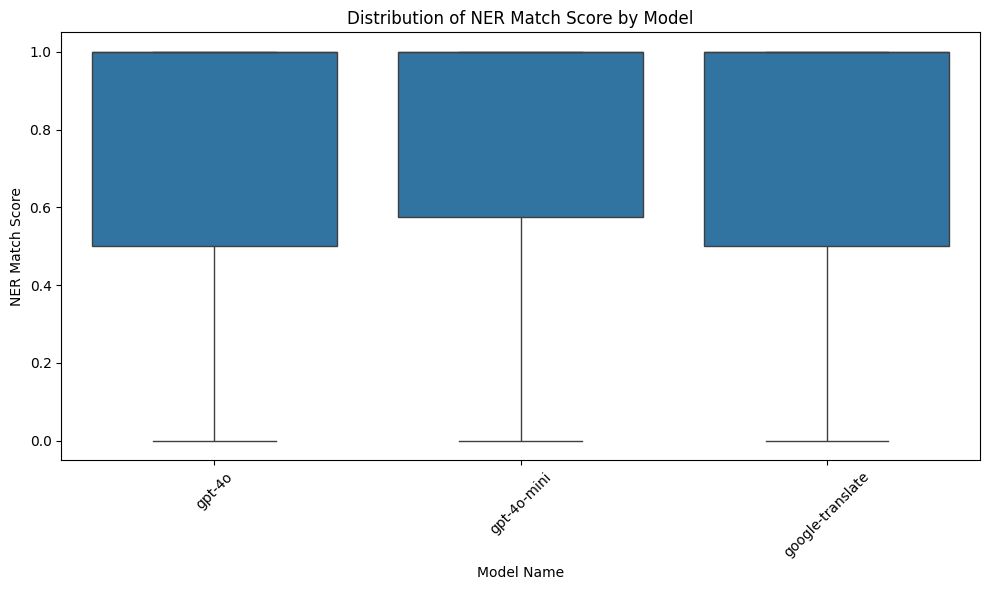

In [26]:
# Box plot for NER match score distribution by model
plt.figure(figsize=(10, 6))
sns.boxplot(x='model_name', y='ner_match_score', data=evaluator_df)
plt.title('Distribution of NER Match Score by Model')
plt.ylabel('NER Match Score')
plt.xlabel('Model Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3. Heatmap of Correlations Between Metrics:

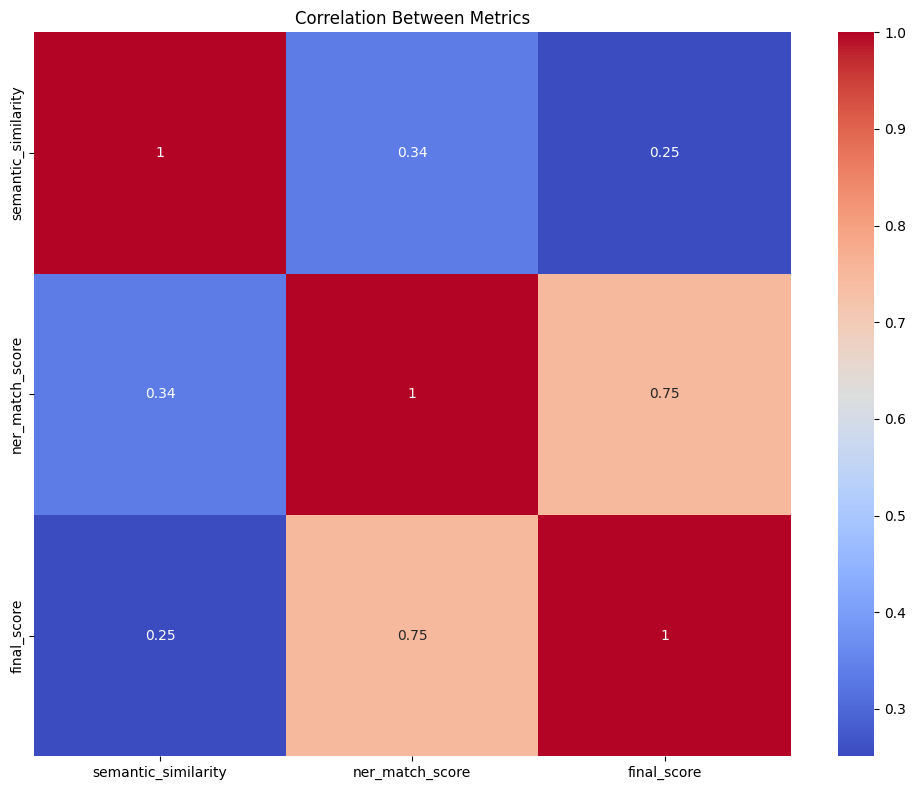

In [27]:
# Correlation heatmap for all models
plt.figure(figsize=(10, 8))
correlation_matrix = evaluator_df[['semantic_similarity', 'ner_match_score', 'final_score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Metrics')
plt.tight_layout()
plt.show()

## 4. Histograms of Scores:

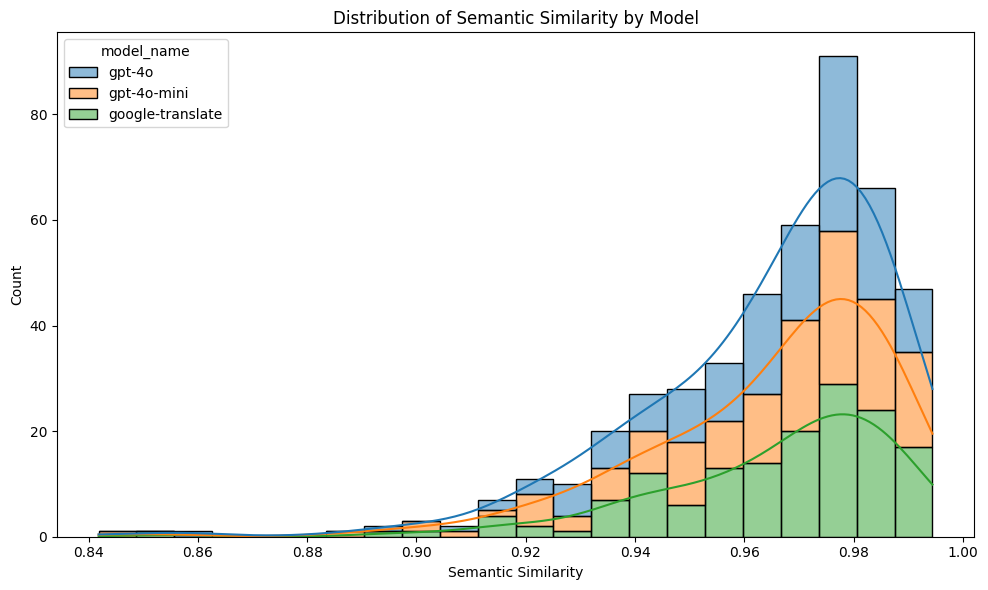

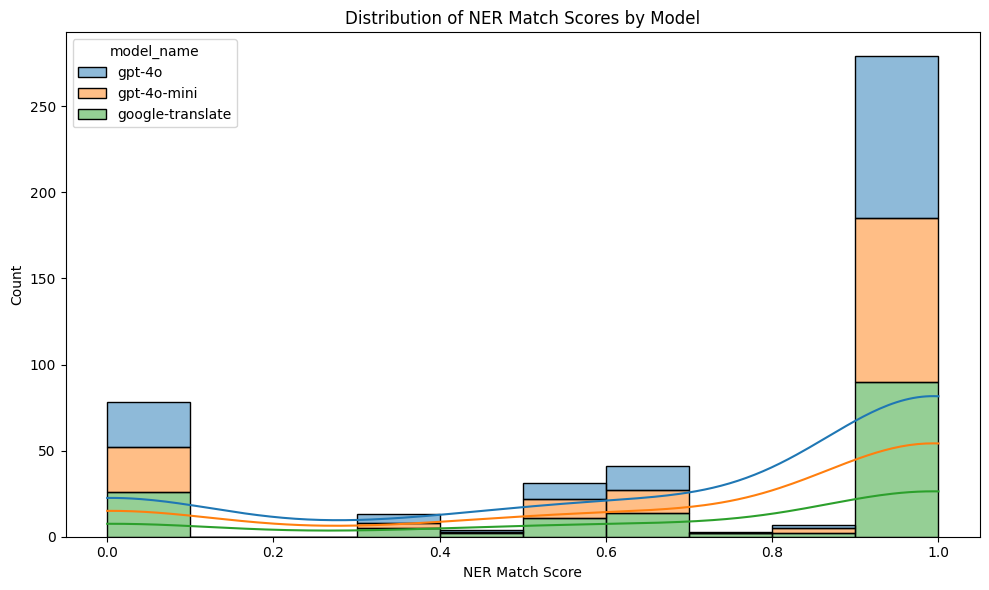

In [28]:
# Histogram for semantic similarity distribution
plt.figure(figsize=(10, 6))
sns.histplot(evaluator_df, x='semantic_similarity', hue='model_name', kde=True, multiple='stack')
plt.title('Distribution of Semantic Similarity by Model')
plt.xlabel('Semantic Similarity')
plt.tight_layout()
plt.show()

# Histogram for NER match score distribution
plt.figure(figsize=(10, 6))
sns.histplot(evaluator_df, x='ner_match_score', hue='model_name', kde=True, multiple='stack')
plt.title('Distribution of NER Match Scores by Model')
plt.xlabel('NER Match Score')
plt.tight_layout()
plt.show()

## 5. Comparing Hebrew vs English Translations:

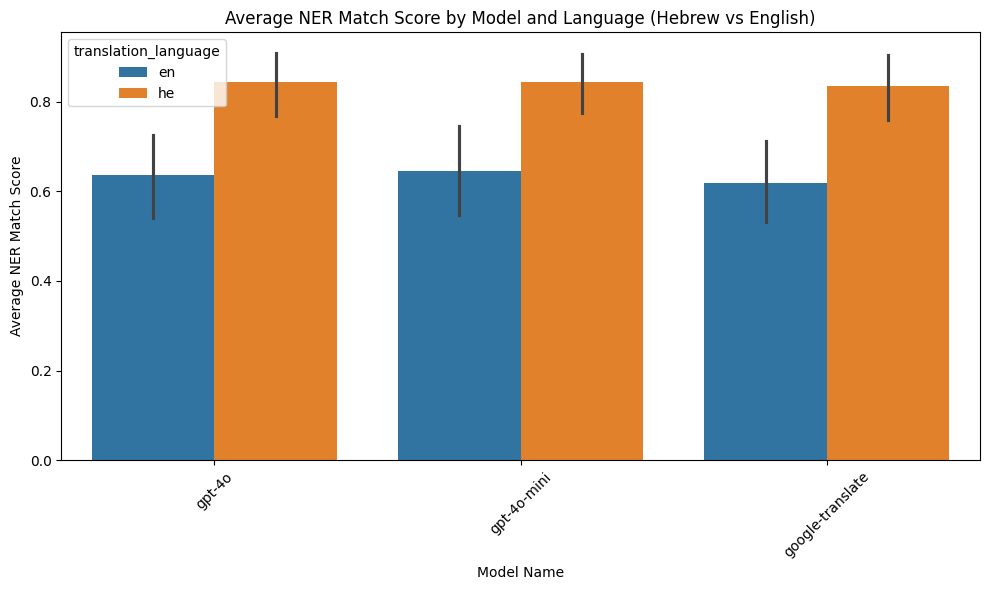

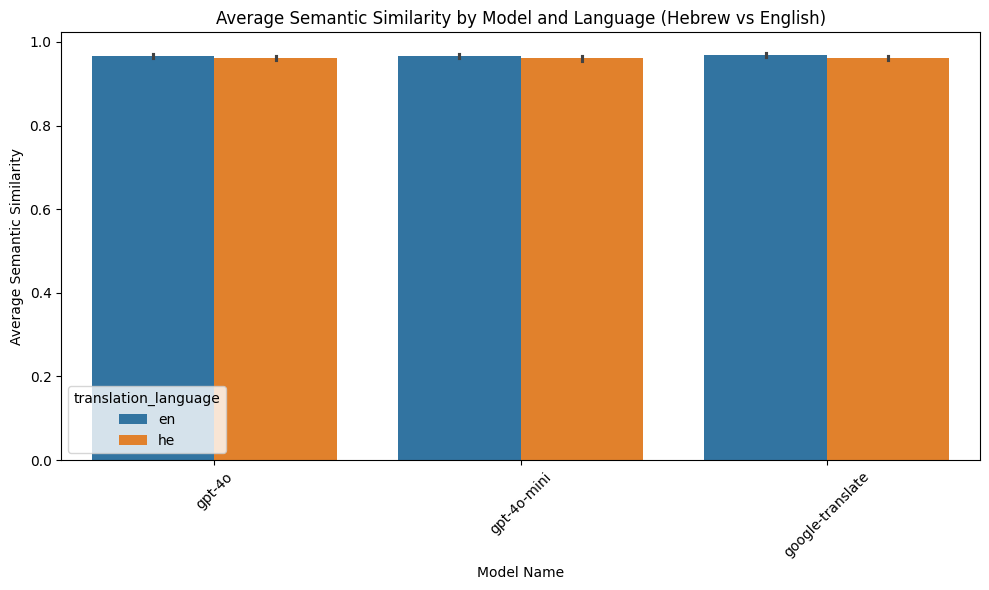

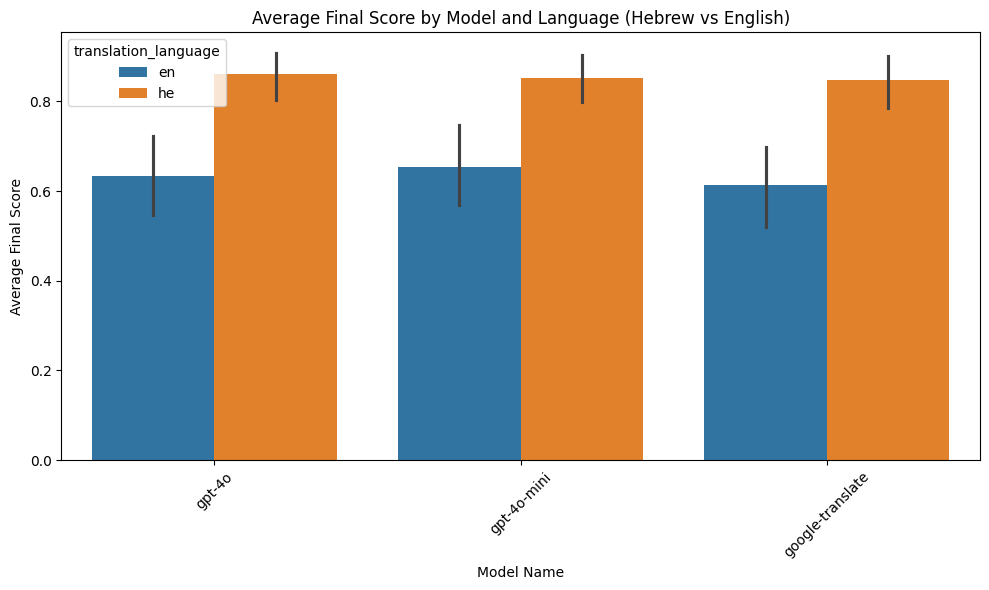

In [29]:
# Bar plot for NER match score split by translation language
plt.figure(figsize=(10, 6))
sns.barplot(x='model_name', y='ner_match_score', hue='translation_language', data=evaluator_df)
plt.title('Average NER Match Score by Model and Language (Hebrew vs English)')
plt.ylabel('Average NER Match Score')
plt.xlabel('Model Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot for semantic similarity split by translation language
plt.figure(figsize=(10, 6))
sns.barplot(x='model_name', y='semantic_similarity', hue='translation_language', data=evaluator_df)
plt.title('Average Semantic Similarity by Model and Language (Hebrew vs English)')
plt.ylabel('Average Semantic Similarity')
plt.xlabel('Model Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot for final score split by translation language
plt.figure(figsize=(10, 6))
sns.barplot(x='model_name', y='final_score', hue='translation_language', data=evaluator_df)
plt.title('Average Final Score by Model and Language (Hebrew vs English)')
plt.ylabel('Average Final Score')
plt.xlabel('Model Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()